In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
import datetime
import operator
%matplotlib inline

In [6]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [7]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152822,152960,152960,152960,153148,153220,153260,153306,153375,153375
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475


In [9]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7093,7101,7101,7101,7116,7118,7123,7127,7127,7127
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258


In [10]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/26/21', '8/27/21', '8/28/21', '8/29/21', '8/30/21', '8/31/21',
       '9/1/21', '9/2/21', '9/3/21', '9/4/21'],
      dtype='object', length=596)

In [12]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,0,0,0,0,0,0,0,0,0,0,...,152822,152960,152960,152960,153148,153220,153260,153306,153375,153375
1,0,0,0,0,0,0,0,0,0,0,...,142253,143174,144079,144847,145333,146387,147369,148222,149117,150101
2,0,0,0,0,0,0,0,0,0,0,...,193674,194186,194671,195162,195574,196080,196527,196915,197308,197659
3,0,0,0,0,0,0,0,0,0,0,...,15016,15025,15025,15025,15032,15033,15046,15052,15055,15055
4,0,0,0,0,0,0,0,0,0,0,...,46726,46929,47079,47168,47331,47544,47781,48004,48261,48475


In [15]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
230,0,1,3,3,4,5,7,7,10,13,...,66928,66928,67171,67171,67459,67620,67800,67991,68210,68469


In [17]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,0,0,0,0,0,0,0,0,0,0,...,7093,7101,7101,7101,7116,7118,7123,7127,7127,7127
1,0,0,0,0,0,0,0,0,0,0,...,2486,2487,2490,2492,2495,2498,2501,2505,2508,2512
2,0,0,0,0,0,0,0,0,0,0,...,5121,5148,5179,5209,5240,5269,5302,5339,5373,5399
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1182,1186,1192,1201,1210,1217,1227,1235,1248,1258


In [13]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/26/21,8/27/21,8/28/21,8/29/21,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [19]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(220239588,
 4560851,
 0,
 [557,
  655,
  941,
  1433,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30803,
  34396,
  37130,
  40160,
  42769,
  44811,
  45229,
  60382,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79546,
  80400,
  81377,
  82736,
  84122,
  86014,
  88396,
  90375,
  92977,
  95281,
  98094,
  102015,
  106109,
  110048,
  114231,
  119052,
  126719,
  132507,
  146880,
  157983,
  169243,
  184034,
  200025,
  219605,
  246703,
  277580,
  309733,
  344784,
  387549,
  428614,
  479649,
  542615,
  607703,
  674931,
  734395,
  799670,
  876514,
  959593,
  1042604,
  1126371,
  1185525,
  1256920,
  1330324,
  1400195,
  1483570,
  1570452,
  1655865,
  1730162,
  1850115,
  1921102,
  2005378,
  2082987,
  2178439,
  2266574,
  2343710,
  2420687,
  2496244,
  2571994,
  2653342,
  2737666,
  2821824,
  2904203,
  2975522,
  3045791,
  3121448,
  3198641,
  3282173,
  

In [20]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [21]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [22]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [23]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      153375
 1      150101
 2      197659
 3       15055
 4       48475
         ...  
 274    511170
 275    351809
 276      8056
 277    207028
 278    125425
 Name: 9/4/21, Length: 279, dtype: int64,
 0       7127
 1       2512
 2       5399
 3        130
 4       1258
        ...  
 274    12793
 275     3720
 276     1519
 277     3614
 278     4466
 Name: 9/4/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 9/4/21, Length: 264, dtype: int64)

In [115]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [116]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

<b>Polynomial Regression</b>

In [125]:
days_to_skip = 529
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, singapore_cases, test_size=0.3, random_state= 0 )

In [126]:
poly = PolynomialFeatures(degree = 4)
x_train_poly, x_test_poly = poly.fit_transform(X_train_sg_confirmed), poly.fit_transform(X_test_sg_confirmed)

polyReg = linear_model.LinearRegression()
poly_model = polyReg.fit(x_train_poly,y_train_sg_confirmed)
coef = poly_model.coef_
intercept = poly_model.intercept_
coef

array([[ 0.00000000e+00,  2.99687538e+02,  6.13896773e-01,
        -3.94531809e-03,  4.16258165e-06]])

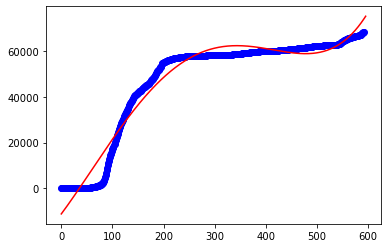

In [127]:

x_axis = np.arange(0, 595, 0.1)
# response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2+ coef[0][3] * x_axis**3 
response = intercept + coef[0][1] * x_axis + coef[0][2] * x_axis**2 + coef[0][3] * x_axis**3  + coef[0][4] * x_axis**4

plt.scatter(days_since_1_22, singapore_cases, color='b')
plt.plot(x_axis, response, color='r')
plt.show()

In [128]:
prediction = poly_model.predict(x_test_poly)

print(r2_score(prediction, y_test_sg_confirmed))
print('MAE:', mean_absolute_error(prediction, y_test_sg_confirmed))
print('MSE:',mean_squared_error(prediction, y_test_sg_confirmed))
for i in future_forecast[-10:]:
    print(poly_model.predict(poly.fit_transform([i])))

0.9614181742427282
MAE: 3377.9279605665783
MSE: 17929252.684083816
[[74163.38947313]]
[[74498.74216936]]
[[74838.85043781]]
[[75183.74989837]]
[[75533.47627086]]
[[75888.06537497]]
[[76247.55313033]]
[[76611.97555644]]
[[76981.36877271]]
[[77355.76899847]]


<b>MLP</b>

In [131]:
X_train_sg_confirmed, X_test_sg_confirmed, y_train_sg_confirmed, y_test_sg_confirmed = train_test_split(days_since_1_22, singapore_cases, test_size=0.3)
mlp = MLPClassifier(max_iter=698, activation='relu', hidden_layer_sizes= (32,17), solver="adam",epsilon=1,shuffle=False,learning_rate_init=0.001,batch_size=5)#tried multiple hyper parameter but still not result 
mlp

MLPClassifier(batch_size=5, epsilon=1, hidden_layer_sizes=(32, 17),
              max_iter=698, shuffle=False)

In [132]:
mlp_model = mlp.fit(X_train_sg_confirmed,y_train_sg_confirmed.ravel())

In [133]:
pred = mlp_model.predict(X_test_sg_confirmed)
pred

array([19410, 19410, 19410, 19410, 26098, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410,   110, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 26098,   110, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410,   110, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       26098,   110, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
         110, 19410, 19410, 19410, 19410, 19410, 19410,   110, 19410,
       19410, 26098, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410, 19410,

In [134]:
mlp_model.score(X_test_sg_confirmed,y_test_sg_confirmed)


0.0

In [135]:
mlp_model.predict(future_forecast[-10:])


array([19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410, 19410,
       19410], dtype=int64)